In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi'] = 120  

# Estilo de gráficas: 
#https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('bmh')

In [3]:
#Importación del dataset "consumo"
columnas = ['MPG', 'CILINDROS', 'DESPAZAMIENTO', 'HP', 'PESO', 'ACELERACION', 'AÑO', 'ORIGEN', 'MODELO']
df = pd.read_csv('auto-mpg.data', sep = r"\s+", names = columnas)
df.set_index('MODELO', inplace=True)
np.random.seed(1234)

In [4]:
# Cinco primeros registros
df.head()

,MPG,CILINDROS,DESPAZAMIENTO,HP,PESO,ACELERACION,AÑO,ORIGEN
MODELO,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
# Estadisticas descriptivas
df.describe()

,MPG,CILINDROS,DESPAZAMIENTO,PESO,ACELERACION,AÑO,ORIGEN
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Vemos que no hay estadisticas asociadas para los valores de los caballos de fuerza
# Probaremos mostrar el tipo de datos, para cada una de las columnas del dataset
df.dtypes

MPG              float64
CILINDROS          int64
DESPAZAMIENTO    float64
HP                object
PESO             float64
ACELERACION      float64
AÑO                int64
ORIGEN             int64
dtype: object

In [7]:
# Efectivamente los caballos de fuerza son de tipo object, por lo tanto debemos pasarlos al tipo int o float, para obtener sus estadisticas
df= df[df["HP"]!="?"]
df["HP"] = pd.to_numeric(df["HP"])

In [8]:
df.dtypes

MPG              float64
CILINDROS          int64
DESPAZAMIENTO    float64
HP               float64
PESO             float64
ACELERACION      float64
AÑO                int64
ORIGEN             int64
dtype: object

In [9]:
df.describe()

,MPG,CILINDROS,DESPAZAMIENTO,HP,PESO,ACELERACION,AÑO,ORIGEN
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


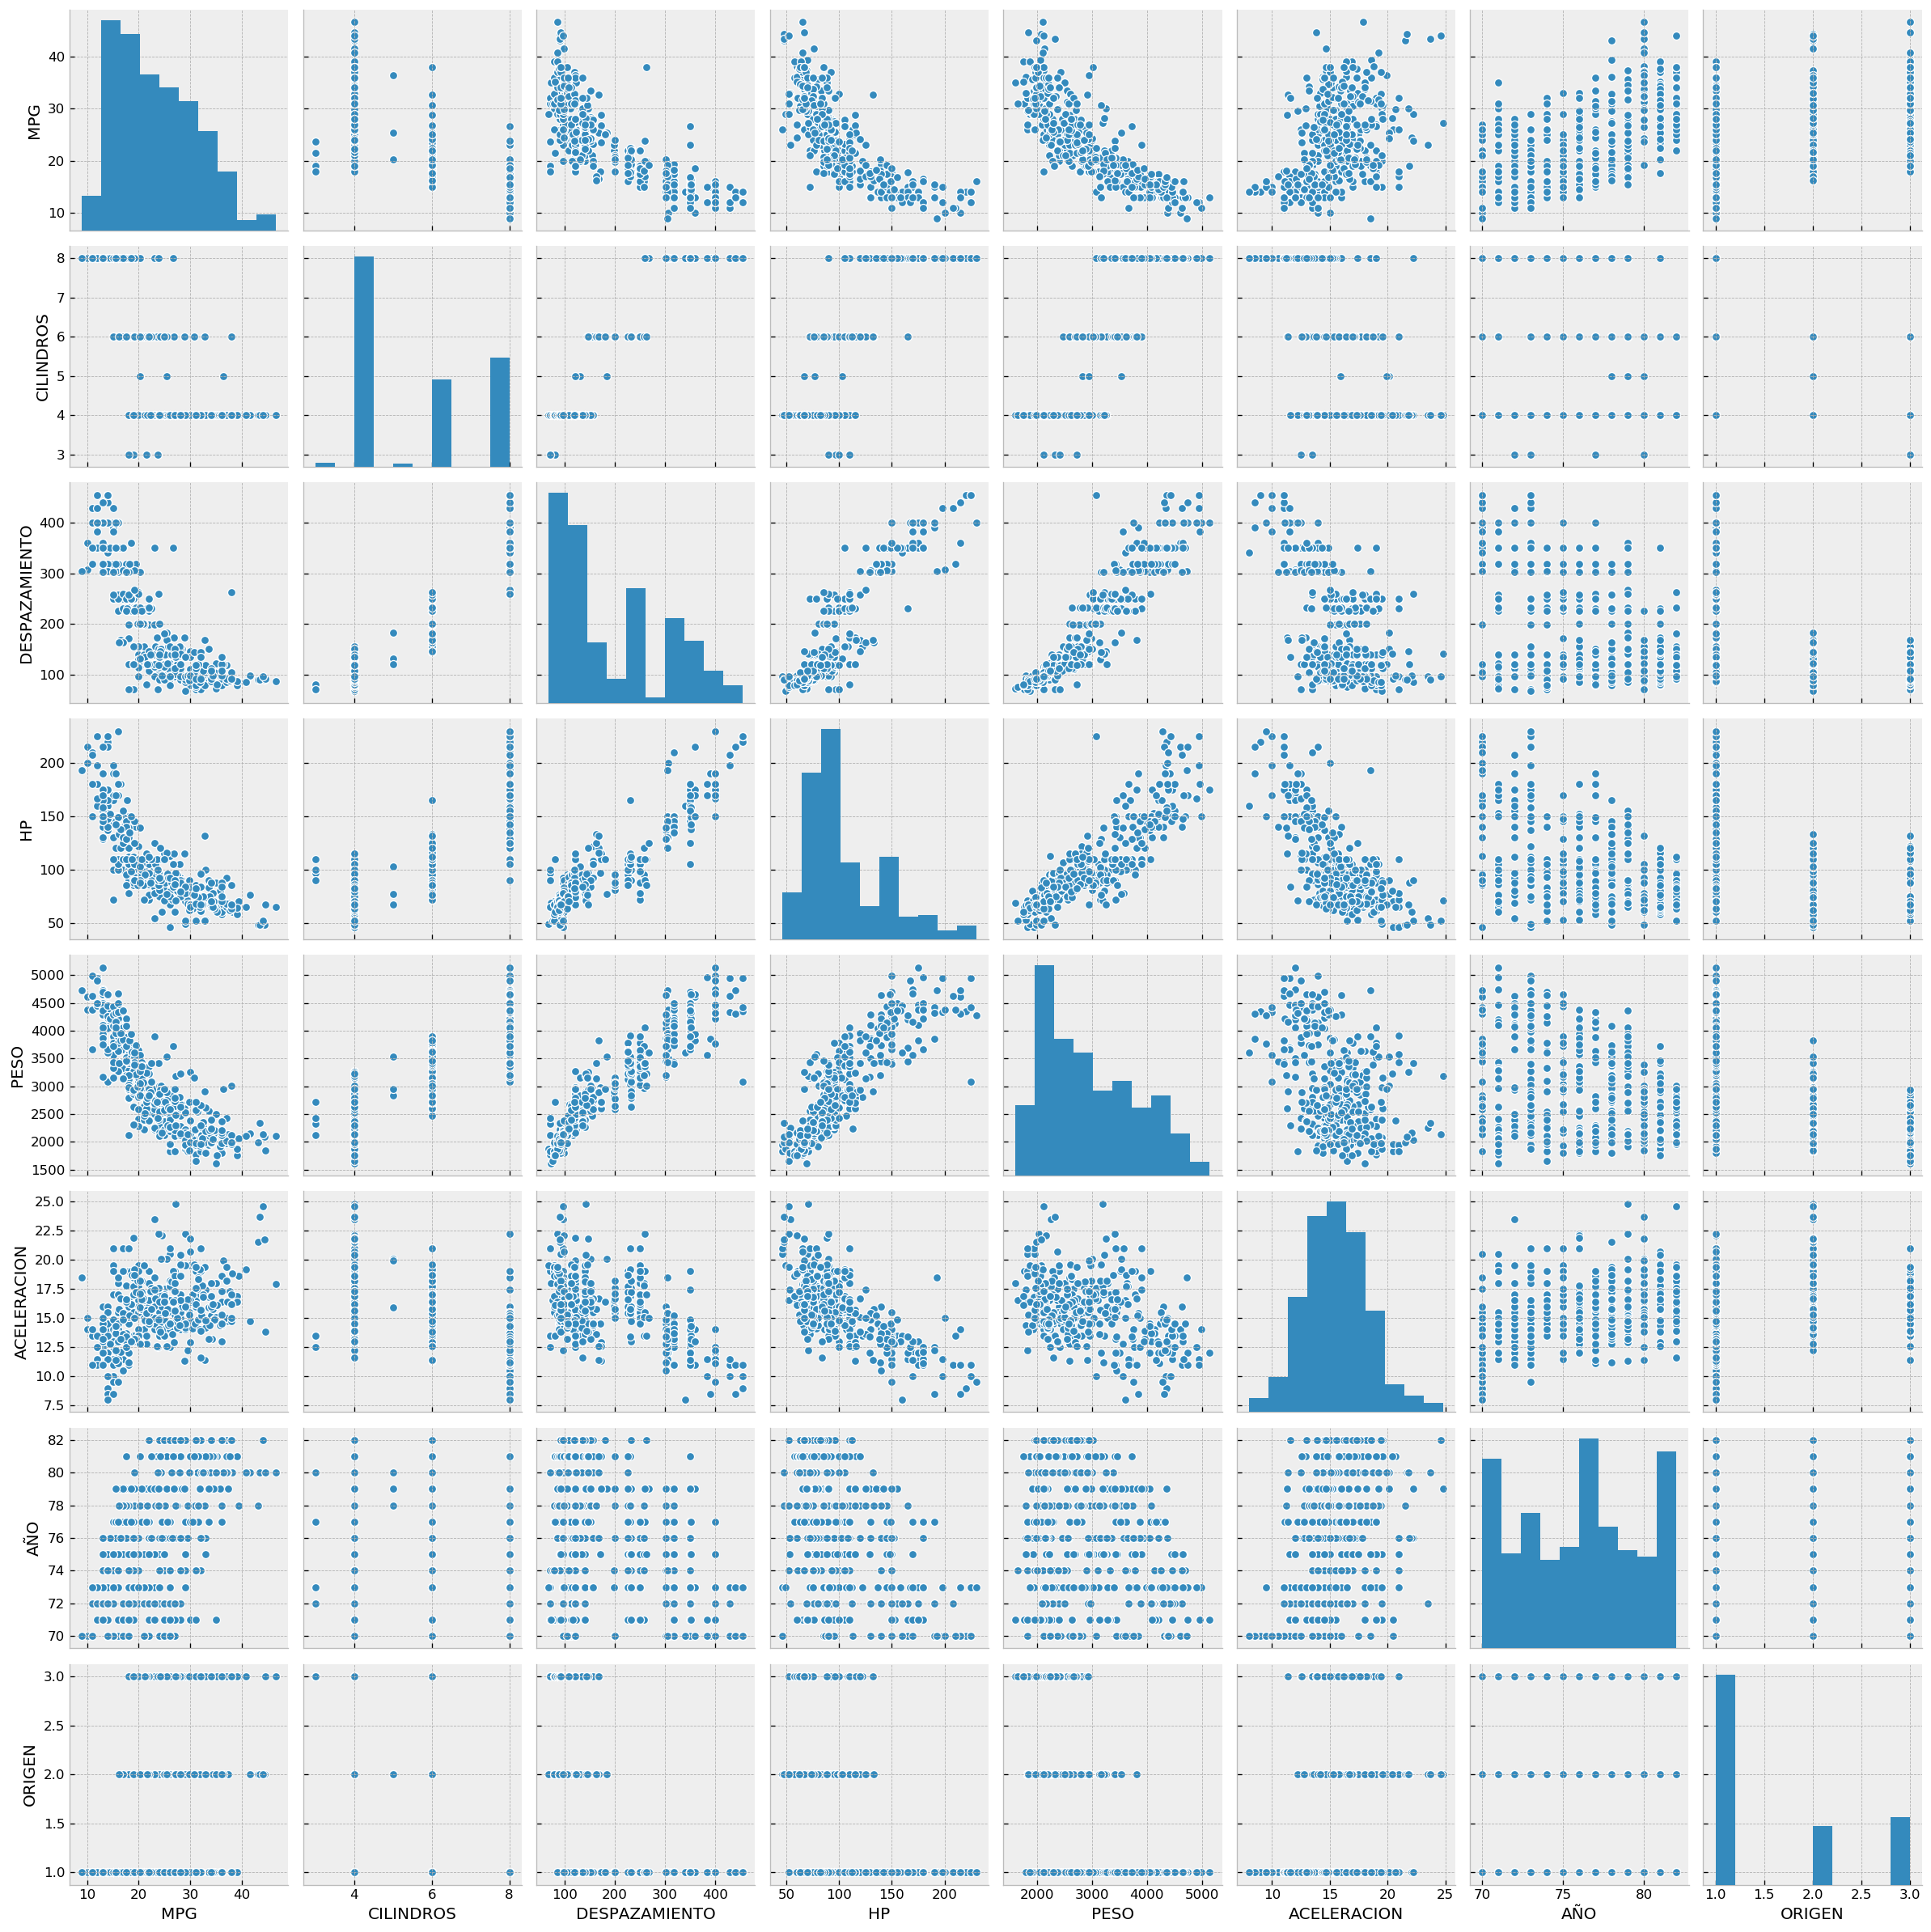

In [10]:
# Diagramas de dispersión
import seaborn as sns
sns.pairplot(df, height = 2.5)
plt.tight_layout()
plt.show()

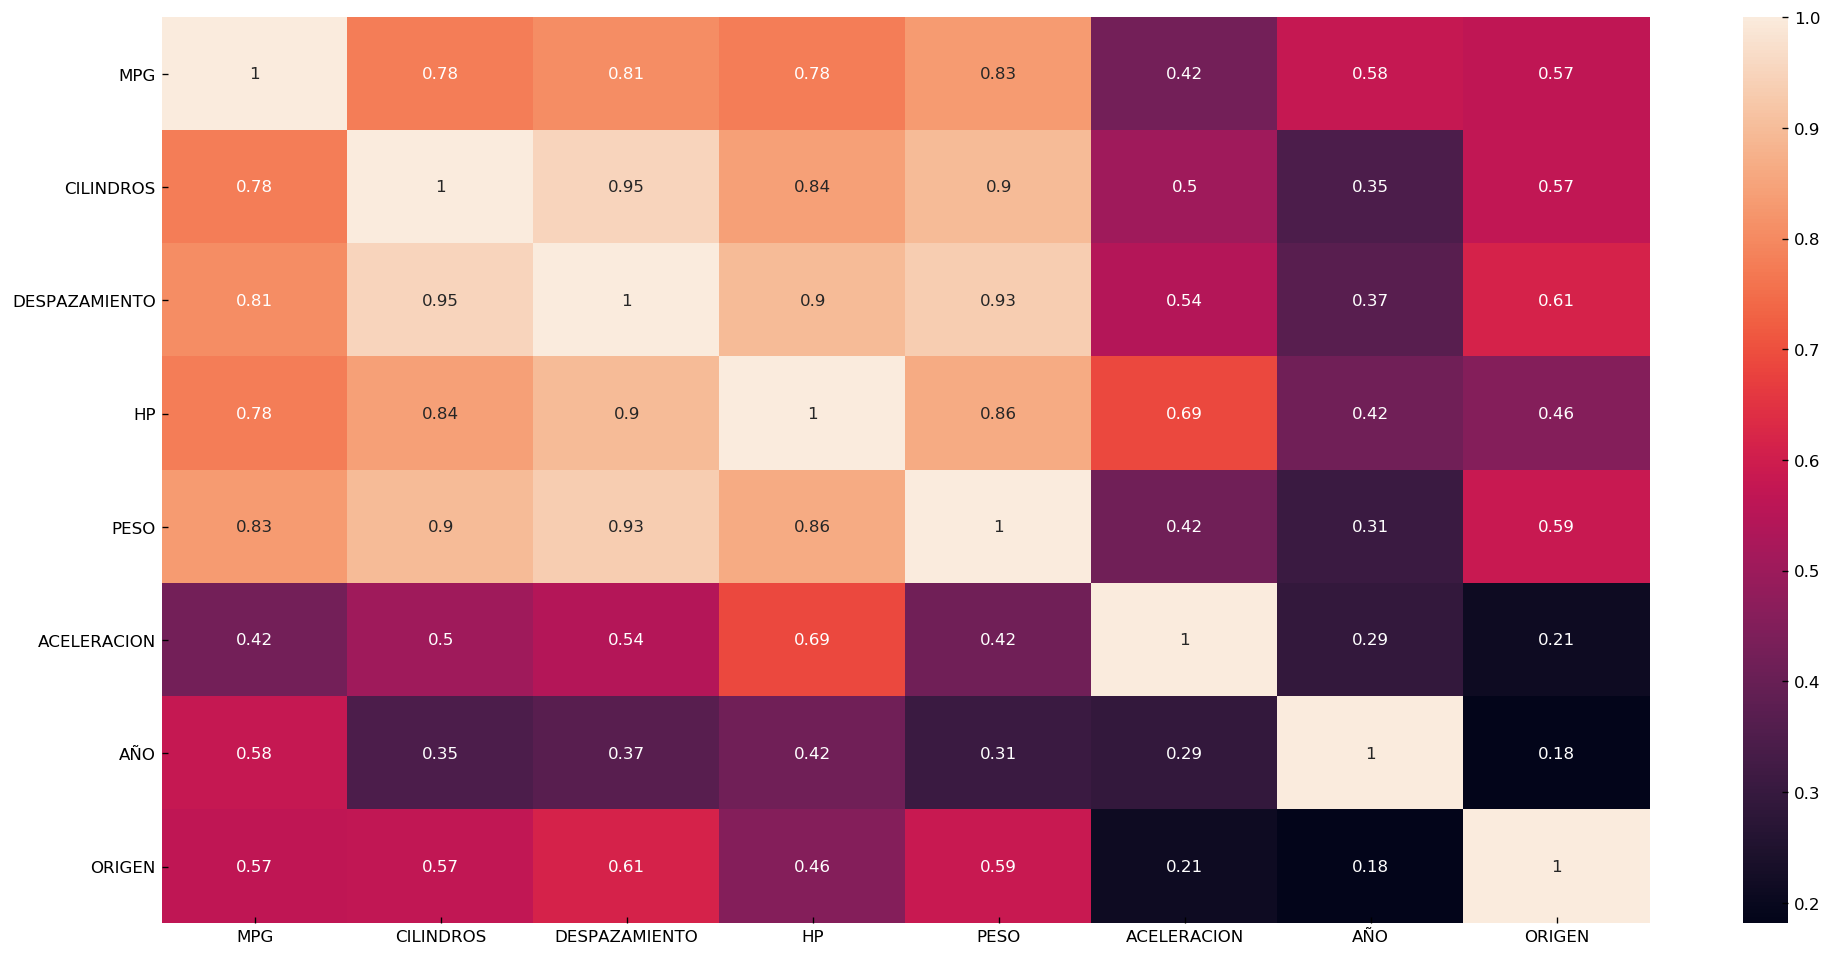

In [11]:
# Mapa de calor (Correlaciones)
# Mapa de calor (correlaciones)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),
           annot = True,
           annot_kws = {'size': 10})
plt.show()

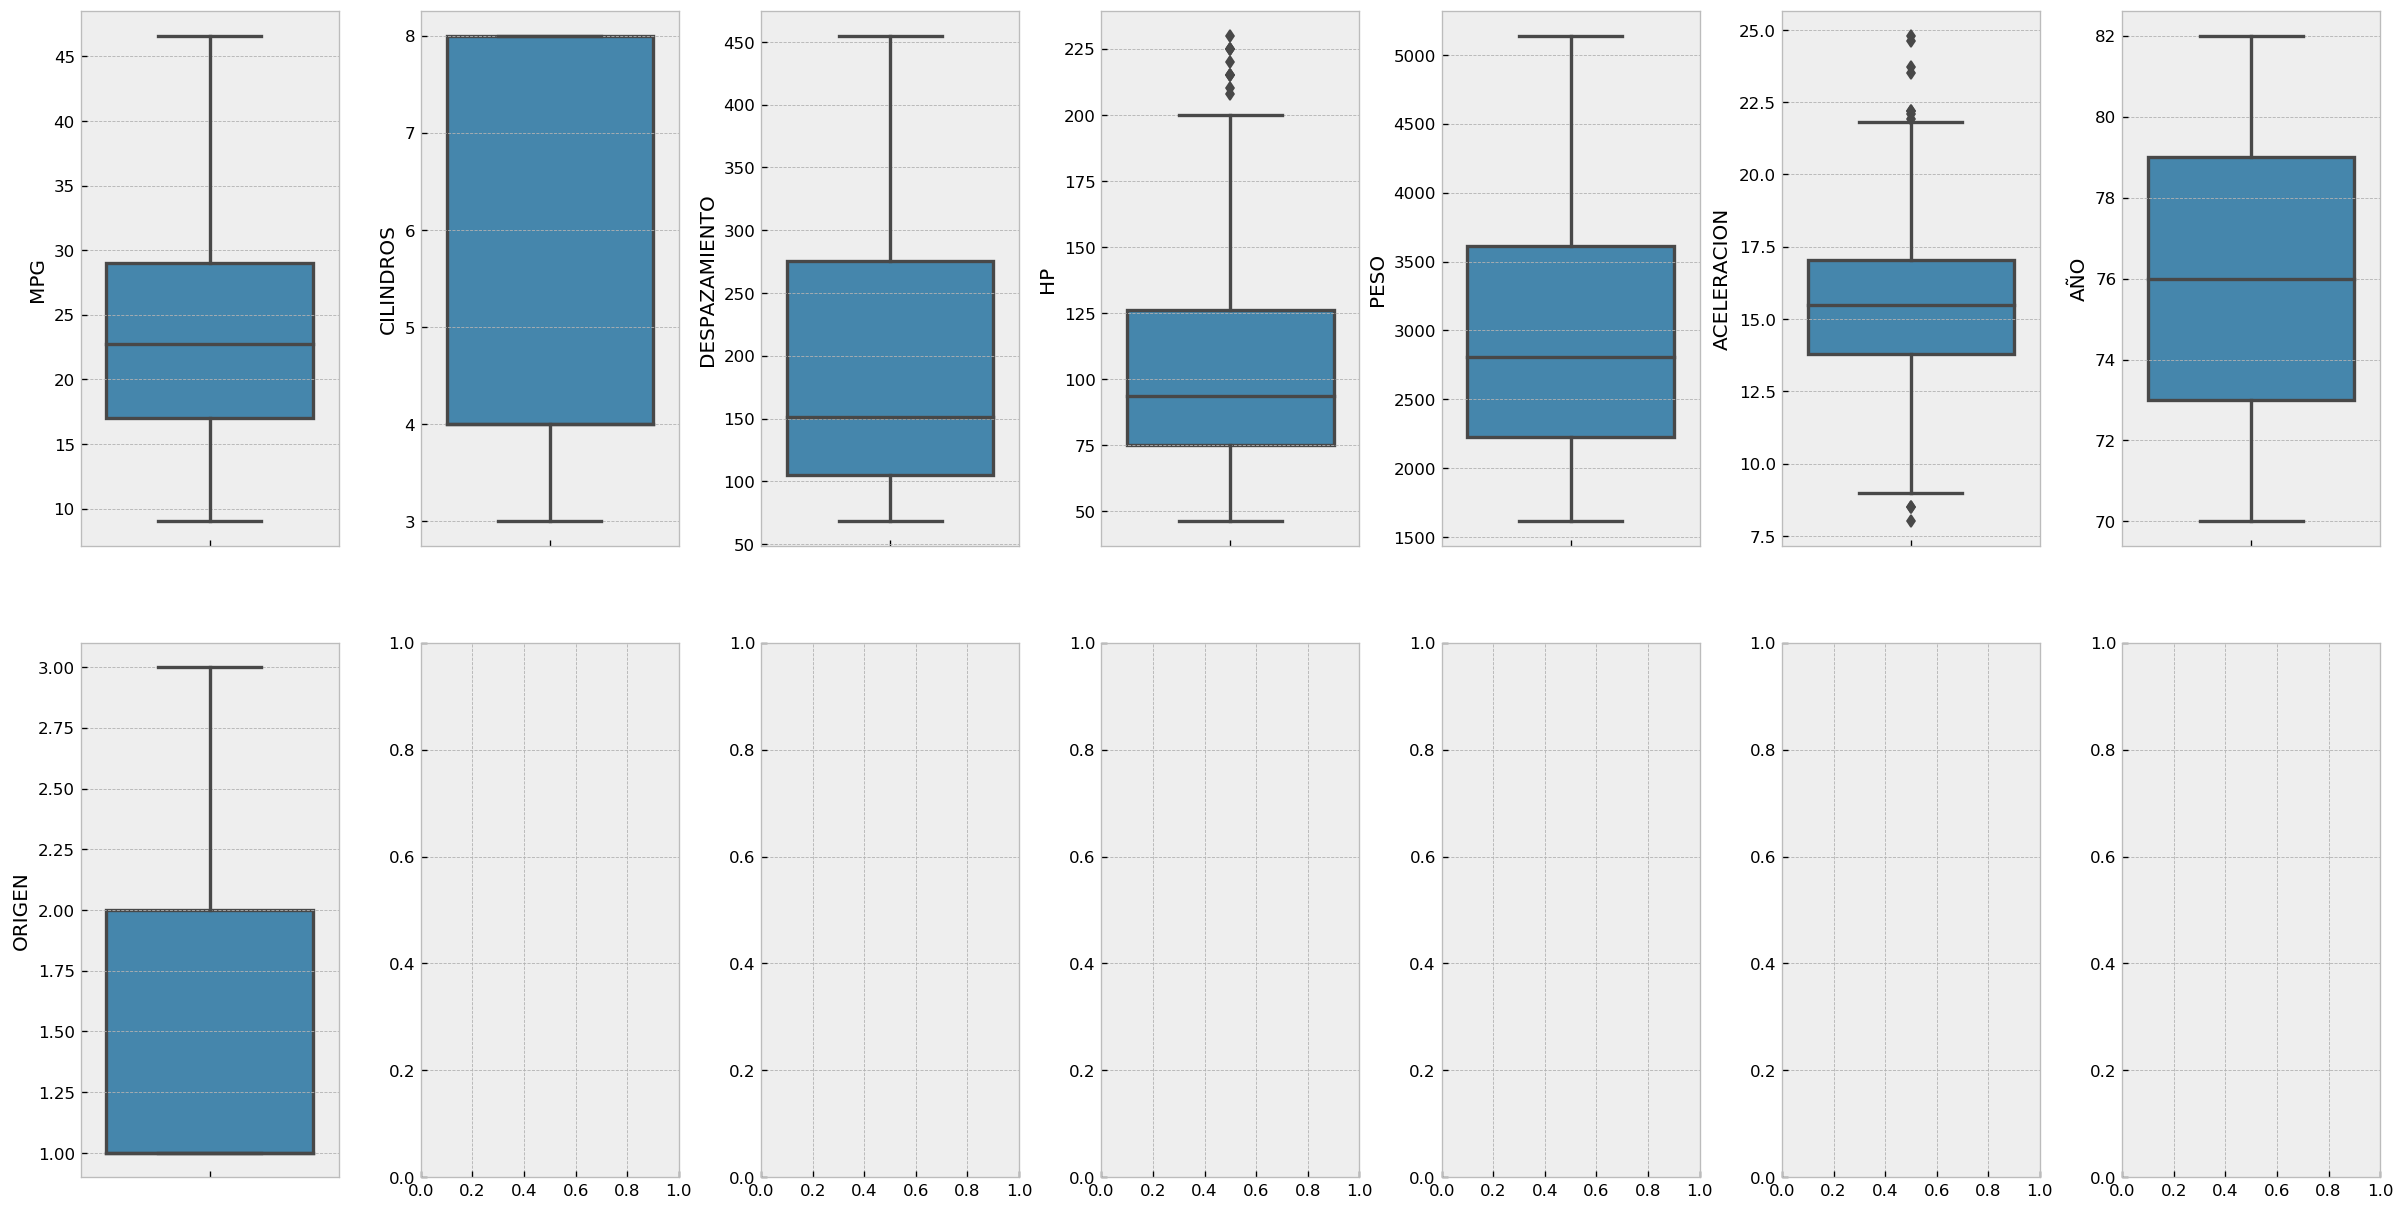

In [12]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y = k, data = df, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5)

In [13]:
# Porcentaje de outliers por columna
for k,v in df.items():
    q1 = v.quantile(0.25) #cuartil 1
    q3 = v.quantile(0.75) #cuartil 3
    irq = q3 - q1 #distancia intercuartil
    v_col = v[(v <= q1 - 1.5*irq)|(v >= q3 + 1.5*irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print('Columna %s outliers = %.2f%%' % (k,perc))

Columna MPG outliers = 0.00%
Columna CILINDROS outliers = 0.00%
Columna DESPAZAMIENTO outliers = 0.00%
Columna HP outliers = 2.55%
Columna PESO outliers = 0.00%
Columna ACELERACION outliers = 2.81%
Columna AÑO outliers = 0.00%
Columna ORIGEN outliers = 0.00%


In [14]:
del df['ACELERACION']

## Cáculo de n para regresión por K vecinos más cercanos

In [15]:
# Importar la librería
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.model_selection import train_test_split
# Crear los datos X,Y
X = df[df.columns[1:]]
Y = df[df.columns[0]]
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [17]:
# Seleccionar el número de vecinos (K) que minimice el MSE entre 2 y 50
K = range(15,60)
mse = []
for i in K:
    knnreg = KNeighborsRegressor(n_neighbors = i) #Instanciar modelos
    knnreg.fit(X_train, y_train) #Entrenar
    pred = knnreg.predict(X_test) #Predecir
    ecm = mean_squared_error(y_test,pred)
    mse.append(ecm)

[]

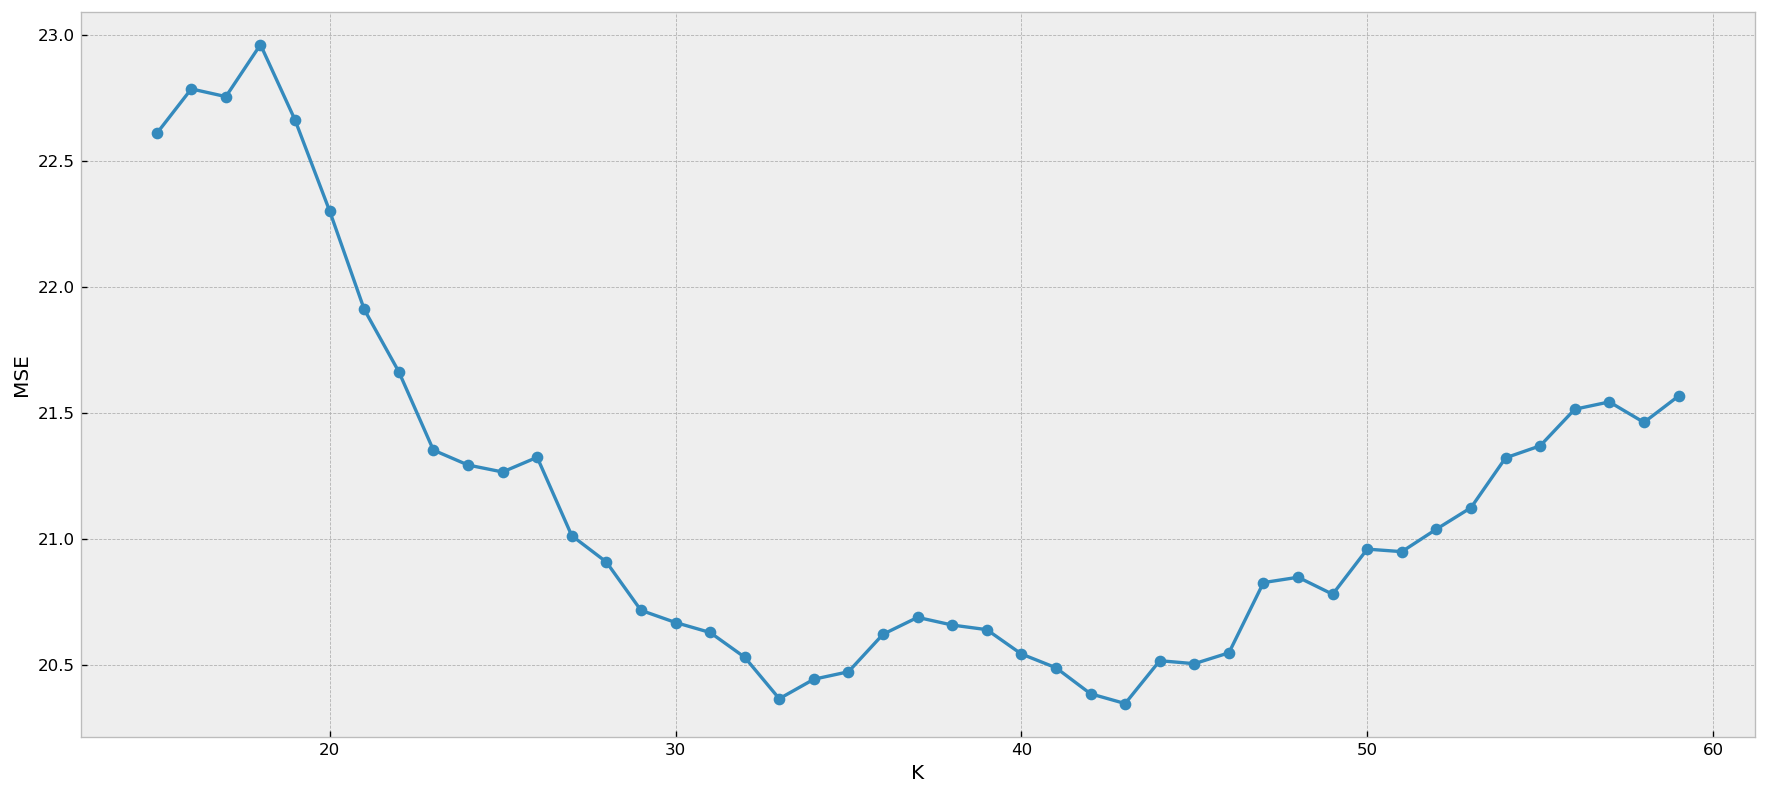

In [18]:
# Graficar resultado
plt.figure(figsize=(18,8))
plt.plot(K,mse, marker = 'o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.plot()

In [31]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [32]:
models_metric= pd.DataFrame({})

model_names = ["LinReg","DTreeReg","SVR", "KNReg"]
models = [LinearRegression(),DecisionTreeRegressor(),SVR(kernel = 'rbf'), KNeighborsRegressor(n_neighbors = 55)]
mse_per_model = []
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_per_model.append(mean_squared_error(y_test,y_pred))
models_metric["x"] = model_names
models_metric["y"] = mse_per_model
print(mse_per_model)

[13.4986008228726, 18.2614406779661, 24.653070604477247, 21.36999596582154]


In [34]:
# Regresión lineal

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
y_pred

array([11.88957877, 20.17714515, 26.07614066, 23.78181514, 28.58346672,
       30.96159309, 25.60823566, 29.30270866, 11.25739666, 32.7179759 ,
       24.51583919, 21.49120386, 23.00380796, 27.75798185, 33.60988741,
       25.96823471, 30.34986487, 27.95390162, 18.03688509, 26.18819406,
       33.66063853, 29.04328834, 20.86765098, 25.27217639,  6.54987662,
       28.58638764, 22.66056736, 35.99261386, 13.57446906, 26.15715446,
       16.4777027 , 10.48200448, 30.07615107, 24.83709339, 19.55809261,
       31.62795727, 14.74587518, 12.37162428, 29.65227881, 19.2265716 ,
       10.24938205, 27.91906534, 34.81195849, 17.22674949, 26.52744633,
       22.64082788, 21.43200202, 27.41429426, 20.57428326, 33.05726286,
       31.2860786 , 12.14149375, 35.4600804 , 23.20651113, 31.62774861,
       32.21895108, 17.97152006, 20.89420207, 13.04163107, 35.40878362,
       29.87968555, 15.75968248, 12.73452872, 25.90105152, 11.15604602,
       20.26970463, 22.75143455, 33.2503456 , 12.37389294, 28.44